In [1]:
from sympy import *
from IPython.display import display, Math
import numpy as np
x, t, z, nu = symbols('x t z nu')
init_printing(use_unicode=True)


In [2]:
x, y = symbols('x y')
expr = x + 2*y
expr


In [3]:
y = Function('y')
eq = Eq(y(t).diff(t, t) - y(t), exp(t))
dsolve(eq, y(t))


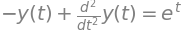

In [4]:
eq


In [5]:
σ = Function('ч')
dsolve(Eq(σ(t).diff(t, t) - σ(t), exp(t)), σ(t))


In [6]:
from sympy import Symbol, nsolve


In [151]:
from sympy import solve
x, y, sigma, mu, delta, alpha, beta, ro, eta, b, lambd = symbols(
    'x y σ μ δ α β ρ η b λ')
sigma_c = 0.1181
ro_c = 1.31
eta_c = 20.19
alpha_c = 1.636
beta_c = 0.002
delta_c = 0.3743
mu_c = 0.005
b_c = 0

dxdt = sigma + ro*x*y/(eta + y) - mu*x*y - delta*x
dydt = alpha*y*(1-beta*y)-x*y-(b*y)/(1+y)

concrete_params = {ro: ro_c, sigma: sigma_c, eta: eta_c, b: b_c,
                   alpha: alpha_c, beta: beta_c, mu: mu_c, delta: delta_c}
muless_params = dict(concrete_params)
del muless_params[mu]


### Точки равновесия

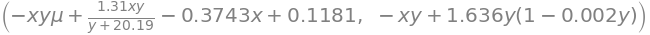

In [156]:
dxdt.subs(muless_params), dydt.subs(muless_params)

In [ ]:
solve((dxdt.subs(muless_params), dydt.subs(muless_params)), x, y)#TODO почему-то не вычисляется

In [157]:
solve(dxdt.subs(muless_params), x, y)

In [158]:
solve(dydt.subs(muless_params), x, y)

In [183]:
concrete_params[mu]=0.1# Решение не зависит от mu
xc, yc = nsolve([dxdt.evalf(subs=concrete_params),
                dydt.evalf(subs=concrete_params)], [x, y], (-1, 1))
yc=0# из-за float накапливается ошибка.
eqilibrium = {x: xc, y: yc}
xc, yc
#TODO 1.636 0 - решение?

#### Проверим, что (xc, yc) - решение

In [189]:
(dxdt.evalf(subs={**eqilibrium, **muless_params}),
dydt.evalf(subs={**eqilibrium, **muless_params}))

### Матрица первого приближения

#### Частные производные

In [190]:
dfdx = diff(dxdt, x)
dfdy = diff(dxdt, y)
dgdx = diff(dydt, x)
dgdy = diff(dydt, y)


In [191]:
display(Math('\dfrac{df}{dx} = ' + latex(dfdx)))
display(Math('\dfrac{df}{dy} = ' + latex(dfdy)))
display(Math('\dfrac{dg}{dx} = ' + latex(dgdx)))
display(Math('\dfrac{dg}{dy} = ' + latex(dfdy)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Частные производные в точке равновесия

In [192]:
a11 = dfdx.evalf(subs={**eqilibrium, **muless_params})
a12 = dfdy.evalf(subs={**eqilibrium, **muless_params})
a21 = dgdx.evalf(subs={**eqilibrium, **muless_params})
a22 = dgdy.evalf(subs={**eqilibrium, **muless_params})


In [193]:
jacob_matrix = Matrix([[a11, a12], [a21, a22]])
jacob_matrix


⎡-0.3743  0.0204722250561954 - 0.315522308308843⋅μ⎤
⎢                                                 ⎥
⎣   0                 1.32047769169116            ⎦

In [194]:
j = jacob_matrix - np.eye(2) * lambd
j


⎡-λ - 0.3743  0.0204722250561954 - 0.315522308308843⋅μ⎤
⎢                                                     ⎥
⎣     0                 1.32047769169116 - λ          ⎦

In [195]:
j.det()


In [200]:
lam1, lam2 = solve(j.det(), lambd)
lam1, lam2